# TD2 : Modélisation de F.T Continues et Echantilonnage

> Semestre P2020
<p>CHOQUEUSE Vincent</p>

In [62]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import lti

## Exercice 1

**Question.** Soit les signaux continus 
\begin{align}
s_1(t)&=10.\cos(4\pi t).u(t)\\
s_2(t)&=10.\cos(4\pi (t-1)).u(t-1)
\end{align}
où $u(t)$ désigne l'échelon unité.

* Écrivez l'expression des signaux échantillonnés pour la période d'échantillonnage $T_e = 0.125$ s sous les formes $s(nTe)$ (abscisse en seconde) et $s[n]$ (abscisse en entier naturel).
* Quelle est la fréquence d'échantillonnage minimale permettant de respecter le Théorème de Shannon ?


**Réponse**

Le passage du signal continu au signal échantillonné s'obtient en posant $t=nT_e$ où $n$ est un entier.

##### Signal $s_1(t)$

* $s_1(nT_e)=10\cos(4\pi nT_e)u(nT_e)=10\cos\left(\pi n/2\right)u(nT_e)$
* $s_1[n]=10\cos(\pi n/2)u[n]$

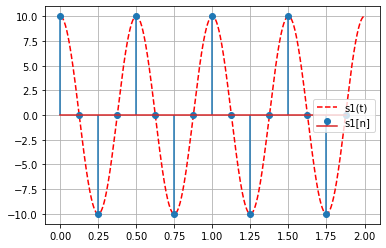

In [63]:
t = np.arange(0,2,0.0001) # time base for the continuous signal
s1 = 10*np.cos(4*np.pi*t)*(t>=0)

Te = 0.125
n = np.arange(2*8)
s1n = 10*np.cos(np.pi*n/2)*(n>=0)

plt.plot(t,s1,"r--",label="s1(t)")
plt.stem(n*Te,s1n,label="s1[n]") # use stem plot for digital signals
plt.grid()
plt.legend();

##### Signal $s_2(t)$

En utilisant le fait que $\cos(\varphi+2k\pi)=\cos(\varphi)$, nous obtenons :

* $s_2(nT_e)=10\cos(4\pi (nT_e-1))u(nT_e-1)=10\cos\left(\pi n/2\right)u(nT_e-1)$
* $s_1[n]=10\cos(\pi n/2)u[n-8]$

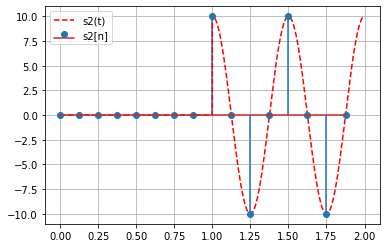

In [64]:
t = np.arange(0,2,0.0001) # time base for the continuous signal
s1 = 10*np.cos(4*np.pi*(t-1))*((t-1)>=0)

Te = 0.125
n = np.arange(2*8)
s1n = 10*np.cos(np.pi*n/2)*((n-8)>=0)

plt.plot(t,s1,"r--",label="s2(t)")
plt.stem(n*Te,s1n,label="s2[n]") # use stem plot for digital signals
plt.grid()
plt.legend();

##### Fréquence d'échantillonnage

Ces deux signaux correspondent à des sinusoides tronquées dans le temps. Une sinusoide s'exprime sous la forme $s(t)=A\cos(2\pi f_0 t+\varphi)$. Par identification, nous trouvons $f_0=2Hz$. En utilisant le théroème de Shannon, il en vient que la fréquence d'échantillonnage doit être fixée de sorte que 

$$F_e \ge 2 f_{max}=2f_0=4~Hz$$

**Question.** Soit le signal continu $s_3(t)=10.(1-e^{-2t}).u(t)$, réponse indicielle d'un système du 1er ordre. Ce signal est transmis à une chaîne de traitement numérique via un convertisseur analogique numérique fonctionnant à la période d'échantillonnage $T_e$.

* Tracer le signal $s_3(t)$.
* Proposez une valeur "argumenté" pour la période d'échantillonnage.
* Écrivez l'expression du signal échantillonné $s[n]$ pour la période d'échantillonnage $T_e = 0.3$s.


**Réponse**

Le signal continu correspond à la réponse indicielle (sous-entendu à un échelon unitaire) d'un premier ordre. La réponse indicielle d'un premier ordre s'exprime sous la forme 

$$s(t)=K(1-e^{-\frac{1}{\tau}t})u(t)$$

Par identification, nous trouvons

* Gain statique: $K=10$,
* Constante de temps : $\tau=0.5$s.

Text(0.5, 0, 'time [s]')

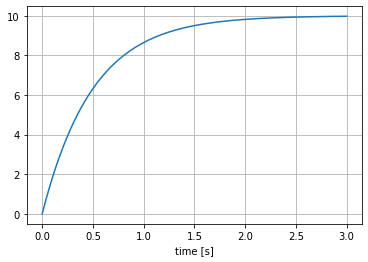

In [65]:
t = np.arange(0,3,0.001) # time base for the continuous signal
s3 = 10*(1-np.exp(-2*t))*(t>= 0)

plt.plot(t,s3,label="s3t")
plt.grid()
plt.xlabel("time [s]")

Pour déterminer la fréquence d'échantillonnage, il est interessant d'analyser le comportement fréquentiel.

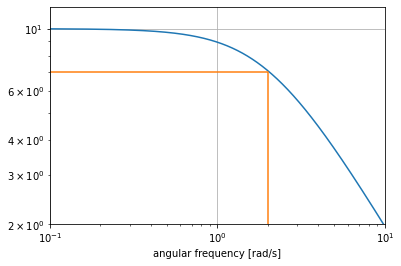

In [66]:
wc = 2
fc= wc/(2*np.pi)
sys = lti([10],[0.5,1])
w,Hjw = sys.freqresp()

plt.loglog(w,np.abs(Hjw))
plt.plot([0.1,wc,wc],[10*0.7,10*0.7,0.1])
plt.xlabel("angular frequency [rad/s]")
plt.xlim([0.1,10])
plt.grid()
plt.ylim([2,12]);

Dans le domaine fréquentiel, le système se comporte comme un filtre passe-bas. La pulsation de coupure à -3dB est égale à $\omega_c=\frac{1}{\tau}=2$ rad/s, soit $f_c=\frac{\omega_c}{2\pi}=0.318$ Hz. En pratique, il serait toutefois dangereux de fixer $f_{max}=f_c$ et donc $F_e=2f_c$ car, avec une attenuation de $-3$dB, la présence de repliement peut être significatif. 

En pratique, il est courant de fixer la fréquence d'échantillonnage de la manière suivante :

$$5f_c \le F_e\le 10f_c$$ 

## Exercice 2 : Chaîne de traitement du son

### Descriptif du système

Soit la chaîne suivante composée :

* d'un microphone pour la prise du son ;
* d'un préamplificateur permettant d'adapter le signal issu du micro à une carte de traitement numérique ;
* d'une carte de traitement numérique munie d'un processeur signal permettant de traiter en temps réel le son issu du microphone ;
* d'un amplificateur de puissance audio ;
* d'un haut-parleur pour restituer le son après traitement.

<figure style="padding:40px">
    <img src="img/fig2.png" style="width: 600px">
    <figcaption style="text-align:center;font-style: italic;">Fig1. Description du système</figcaption>
</figure>


Les caractéristiques des différents blocs sont :

* **Microphone**: convertie une onde acoustique $e(t)$ (Pascal) en tension. Il agit comme un filtre passe-bas du 1er ordre de fréquence de coupure à -3dB $f_c = 30$ kHz. En basse fréquence son gain est de $0.5$.
* **Pré-amplificateur**: amplifie en puissance le son issu du micro. Il peut être considéré comme un filtre du 1er ordre passe bas de constante de temps 1 μs et de gain statique en tension de $10$.
* **Carte de traitement**: elle est munie d'un convertisseur analogique-numérique 12 bits sur une plage de 10V et d'un convertisseur numérique analogique 12 bits sur une plage de 10V. La fréquence d'échantillonnage est fixée à $24$ kHz. Le traitement numérique est modélisé par une fonction de transfert discrète notée $G(z)$.
* **Amplificateur**: Il s'agit d'un amplificateur de puissance de gain en tension unitaire.
* **Haut-parleur**: Il peut être modélisé par une fonction de transfert du second ordre de type passe-bas. Son gain en basse fréquence est de $0$ dB. Son spectre en fréquence présente un gain maximum de $0.5$ dB à la fréquence $f_r = 40$ kHz.

**Question.** Donnez la nature exacte des signaux $e(t)$, $s(t)$, $v_e(t)$, $v_s(t)$, $v_{ne}[n]$, $v_{ns}[n]$. Quelle hypothèse fait-on sur $v_{ne}[n]$ et $v_{ns}[n]$ par la suite ?

**Réponse:**

* $e(t)$ et $s(t)$ : onde acoustique (Pascal)
* $v_e(t)$ et $v_s(t)$ : signaux electriques (Volt)
* $v_{ne}[n]$ et $v_{ns}[n]$ : signaux numériques

Par la suite, on fait les hypothèses suivantes :

* Le théorème de Shannon sur la fréquence d’échantillonnage est respecté.
* Les échantillons ont une durée nulle.

**Question.** Écrivez les fonctions de transfert des blocs : micro, pré-ampli, amplificateur et haut parleur

**Réponse:**

* Micro :
    * Premier ordre avec $f_c=30$kHz, donc $\tau=\frac{1}{\omega_c}=\frac{1}{2\pi f_c}=5.3\times 10^{-6}$
    * Gain en basse fréquence de 0.5, donc $K=0.5$
    
$$H_{mic}(p)=\frac{0.5}{5.3\times 10^{-6}p+1}$$

* Pré-ampli :
    * Filtre du 1er ordre passe bas de constante de temps $1\mu s$ et de gain statique en tension de 10.

$$H_{pre}(p)=\frac{10}{10^{-6}p+1}$$

* Amplificateur : 
    * Amplificateur de puissance de gain en tension unitaire

$$H_{amp}(p)=1$$

* Haut-parleur :
    * Second ordre avec un gain en basse-fréquences de 0dB $\to K=1$
    * Facteur de résonance égal à $0.5-0=0.5$dB : $m=0.58$ (voir [abaque](https://vincentchoqueuse.github.io/web_app_2nd_order_performances/index.html))
    * Pulsation de résonance $\omega_r=2\pi f_r=251327$ rad/s. Comme $\omega_r=\omega_0\sqrt{1-2m^2}$, nous en déduisons que $\omega_0=440\times 10^3$ rad/s
    
$$H_{HP}(p)=\frac{1}{5.18\times 10^{-12}p^2+2.64\times 10^{-6}p+1}$$


**Question.** Déterminez les gains de conversion des convertisseurs CAN et CNA.

**Réponse:**

* CAN (sortie bits/ entrée tension): 

$$G_{AN}=\frac{2^{12}}{\Delta E}=409.6$$

* CNA (sortie tension/ entrée bits): 

$$G_{NA}=\frac{\Delta E}{2^{12}}=0.00244$$

On souhaite modéliser cette chaîne sous la forme de fonction de transfert, comme présenté sur
la figure suivante :


<figure style="padding:40px">
    <img src="img/fig3.png" style="width: 600px">
</figure>



Les gains de conversions sont inclus dans les fonctions de transfert continues.

**Question.** Déterminez les expressions des fonctions de transfert $F_A(p)$ et $F_B(p)$.

**Réponse:**
    
$$F_A(p)= G_{AN}H_{mic}(p)H_{pre}(p)$$
   
$$F_B(p)= G_{NA}H_{amp}(p)H_{HP}(p)$$